In [ ]:
import nltk
import pandas as pd
import seaborn as sns

In [ ]:
%%capture
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
%run '/content/drive/MyDrive/Work 2022/REP_Analytics/Data-Proc.ipynb'

In [ ]:
processed_df = df.copy()

# Sentiment Analysis

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
df['sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [ ]:
sentiment_series = (df.groupby('name').sum()['sentiment']/df.groupby('name').count()['sentiment']).sort_values()

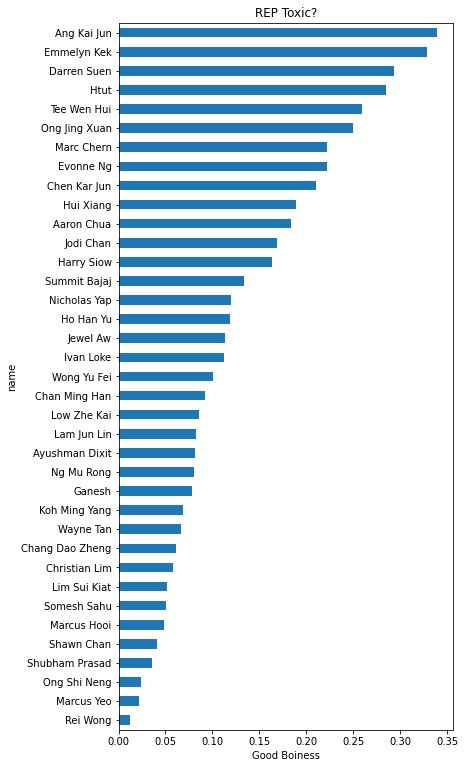

In [ ]:
plt.figure(figsize=(6,13))
plt.title('REP Toxic?')
plt.xlabel('Good Boiness')
plt.ylabel('Sender')

filtered_indexes = ['Rei Wong', 'Marcus Yeo',
       'Ong Shi Neng', 'Shubham Prasad', 'Shawn Chan', 'Marcus Hooi',
       'Somesh Sahu', 'Lim Sui Kiat', 'Christian Lim', 'Chang Dao Zheng',
       'Wayne Tan', 'Koh Ming Yang', 'Ganesh', 'Ng Mu Rong', 'Ayushman Dixit',
       'Lam Jun Lin', 'Low Zhe Kai', 'Chan Ming Han', 'Wong Yu Fei',
       'Ivan Loke', 'Jewel Aw', 'Ho Han Yu', 'Nicholas Yap', 'Summit Bajaj', 'Harry Siow', 'Jodi Chan', 'Aaron Chua', 'Hui Xiang', 'Chen Kar Jun', 'Evonne Ng', 'Marc Chern',
       'Ong Jing Xuan', 'Tee Wen Hui', 'Htut', 'Darren Suen','Emmelyn Kek', 'Ang Kai Jun',]

sentiment_series[filtered_indexes].plot(kind='barh')
plt.savefig('toxicity.png')

# Tokenization

In [ ]:
from nltk.tokenize import RegexpTokenizer

In [ ]:
df = processed_df.copy()
df

,name,text
0,Ayushman Dixit,Aight
1,Low Zhe Kai,o yea for sure
2,Low Zhe Kai,just pm me
3,Ayushman Dixit,Can pm me whr ur residing
4,Christian Lim,ayush staying overnight also?
...,...,...
32997,Ong Shi Neng,oh no
32998,Ong Shi Neng,does that mean school shooting
32999,Ong Shi Neng,ARE THOSE WHAT THE NERF GUNS ARE FOR
33000,Ong Shi Neng,omg


In [ ]:
index = 0
for text in df['text']:
  if '.com' in text or 'http' in text:
    text_list = text.split()
    filtered_text_list = [word for word in text_list if ('.com' not in word and 'http' not in word)]
    text = ' '.join(filtered_text_list)
    df.loc[index,'text'] = text
  index += 1

In [ ]:
regexp = RegexpTokenizer('\w+')

df['text_token'] = df['text'].apply(regexp.tokenize)
df.head(3)

,name,text,text_token
0,Ayushman Dixit,Aight,[Aight]
1,Low Zhe Kai,o yea for sure,"[o, yea, for, sure]"
2,Low Zhe Kai,just pm me,"[just, pm, me]"


In [ ]:
df['text_token'] = df['text_token'].apply(lambda x: [word.lower() for word in x])
df.head()

,name,text,text_token
0,Ayushman Dixit,Aight,[aight]
1,Low Zhe Kai,o yea for sure,"[o, yea, for, sure]"
2,Low Zhe Kai,just pm me,"[just, pm, me]"
3,Ayushman Dixit,Can pm me whr ur residing,"[can, pm, me, whr, ur, residing]"
4,Christian Lim,ayush staying overnight also?,"[ayush, staying, overnight, also]"


# Stop Word Removal

In [1]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")

NameError: ignored

In [ ]:
df['text_token'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head(3)

# Lemmatization

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

In [ ]:
df['text_token'] = df['text_token'].apply(lambda x: " ".join(x))

In [ ]:
df['text_token'].apply(wordnet_lem.lemmatize)

0                               aight
1                            yea sure
2                                  pm
3                  pm whr ur residing
4        ayush staying overnight also
                     ...             
32997                              oh
32998            mean school shooting
32999                       nerf guns
33000                             omg
33001              stay woke go broke
Name: text_token, Length: 33002, dtype: object

# All words analysis

In [ ]:
all_words = ' '.join([word for word in df['text_token']])

In [ ]:
all_words

'aight yea sure pm pm whr ur residing ayush staying overnight also man ready start grind halls empty asf right lol yea came roommate monday mate lit monday scared dam clusterfk sia always indeed eh altho im coming thursday try orientation room wassup ganesh u calling ppl anyone gna hall orientation man typing messed guy smh making friends yea sia ok ahh monday run away soz rep frens  see beautiful people apologies ganesh pls come back yea bro damn boring u try food yet tried north hill canteen alright haha better nothing u eat ah mee pok nubbad ate like taiwan fried chicken thingy like mee pok store yea oshit one bad sia fried chicken gud thai stall actually q nice also bad eat everyday making graduation alive hahahaha either way gonna die might well bro damn good ate mala chicken day hahahah food hunt move ahh yea went north spine today fast food yo tom yum soup north hill canteen rly nice bold statement see true onz tried tested ok u treat onz  eh shubu invited us free treat claim en

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words)
fd = FreqDist(words)

In [ ]:
fd.most_common(100)[10:21]

[('1', 566),
 ('bro', 550),
 ('pls', 541),
 ('2', 540),
 ('anyone', 511),
 ('think', 499),
 ('3', 456),
 ('come', 448),
 ('need', 424),
 ('wait', 423),
 ('prof', 423)]

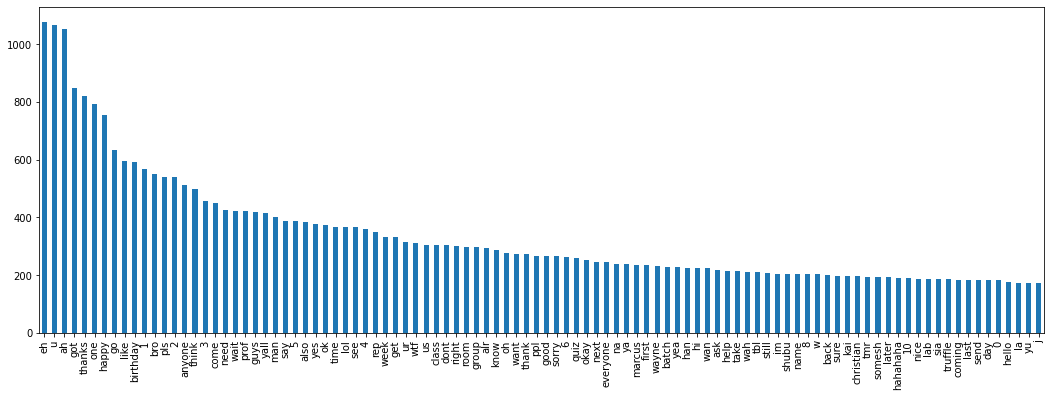

In [ ]:
plt.figure(figsize=(18,6))
pd.Series(dict(fd.most_common(100))).plot(kind='bar')

# Swear Count

In [ ]:
df

,name,text,text_token
0,Ayushman Dixit,Aight,aight
1,Low Zhe Kai,o yea for sure,yea sure
2,Low Zhe Kai,just pm me,pm
3,Ayushman Dixit,Can pm me whr ur residing,pm whr ur residing
4,Christian Lim,ayush staying overnight also?,ayush staying overnight also
...,...,...,...
32997,Ong Shi Neng,oh no,oh
32998,Ong Shi Neng,does that mean school shooting,mean school shooting
32999,Ong Shi Neng,ARE THOSE WHAT THE NERF GUNS ARE FOR,nerf guns
33000,Ong Shi Neng,omg,omg


In [ ]:
df['text_token'] = df['text_token'].apply(lambda x: nltk.word_tokenize(x))
df.head(3)

,name,text,text_token
0,Ayushman Dixit,Aight,[aight]
1,Low Zhe Kai,o yea for sure,"[yea, sure]"
2,Low Zhe Kai,just pm me,[pm]


In [ ]:
senders = df['name'].unique()
senders

array(['Ayushman Dixit', 'Low Zhe Kai', 'Christian Lim', 'Somesh Sahu',
       'Wayne Tan', 'Shubham Prasad', 'Ganesh', 'Aaron Chua',
       'Koh Ming Yang', 'Ang Kai Jun', 'Lim Sui Kiat', 'Ash🔥',
       'Nicholas Yap', 'Chang Dao Zheng', 'Evonne Ng', 'Shawn Chan',
       'Jewel Aw', 'Marcus Hooi', 'Chan Ming Han', 'Chen Kar Jun',
       'Marcus Yeo', 'Harry Siow', 'Wong Yu Fei', 'Ivan Loke', 'Htut',
       'Summit Bajaj', 'Ho Han Yu', 'Rei Wong', 'Lam Jun Lin',
       'Ng Mu Rong', 'Emmelyn Kek', 'Darren Suen', 'Jodi Chan',
       'Tee Wen Hui', 'Grace Wong 05.08.2021 19:39:47', 'Ong Shi Neng',
       'Hui Xiang', 'Marc Chern', 'Ong Jing Xuan',
       'Wayne Tan 26.08.2021 18:25:08', 'Wayne Tan 26.08.2021 18:55:36',
       'Werewolf Moderator [☮]', 'xav  08.09.2021 02:04:45',
       'xav  08.09.2021 02:04:48', 'Htut  via @countmeinbot', 'Skeddy',
       'hannah  10.12.2021 15:34:53', 'Koh Ming Yang via @gamebot',
       'Marcus Hooi via @gamebot', 'Lam Jun Lin via @gamebot',
       'J

In [ ]:
swear_count = dict.fromkeys(senders,0)
swear_word_list = ['fuck','fk','fku','cb','knn','bij','bitch','cunt','lj']
for word in swear_word_list:
  index = 0
  for token_list in df['text_token']:
    sender = df.loc[index]['name']
    swear_count[sender] += token_list.count(word)
    index += 1
swear_count_series = pd.Series(data=swear_count)
swear_count_series.sort_values(ascending=False)

Shubham Prasad                    122
Ong Shi Neng                       66
Somesh Sahu                        47
Christian Lim                      42
Shawn Chan                         25
Ganesh                             24
Lim Sui Kiat                       11
Marcus Hooi                        11
Lam Jun Lin                         6
Ayushman Dixit                      5
Rei Wong                            5
Chan Ming Han                       5
Chang Dao Zheng                     4
Ng Mu Rong                          4
Koh Ming Yang                       4
Summit Bajaj                        3
Wayne Tan                           3
Low Zhe Kai                         3
Ho Han Yu                           2
Chen Kar Jun                        2
Hui Xiang                           1
Grace Wong 04.05.2022 16:52:01      0
Grace Wong 04.05.2022 16:51:54      0
Werewolf Moderator [☮]              0
xav  08.09.2021 02:04:45            0
Grace Wong 04.05.2022 16:57:22      0
xav  08.09.2

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0, flags=flags)


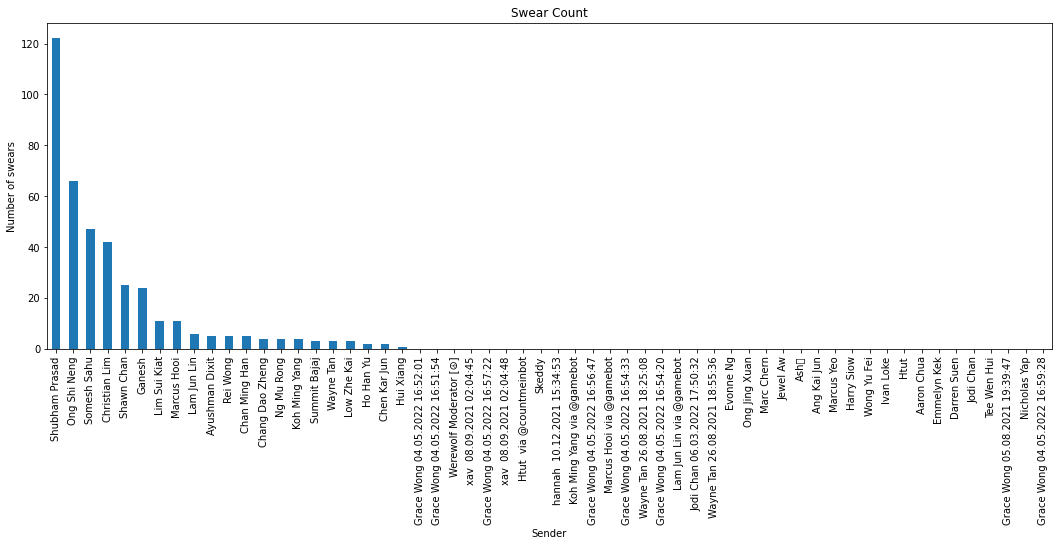

In [ ]:
plt.figure(figsize=(18,6))
plt.title('Swear Count')
plt.xlabel('Sender')
plt.ylabel('Number of swears')
swear_count_series.sort_values(ascending=False).plot(kind='bar')

# Noisiest / Quietest

In [ ]:
df.groupby('name').count()['text'].sort_values(ascending=False)

name
Shubham Prasad                    7422
Christian Lim                     2915
Somesh Sahu                       2913
Shawn Chan                        2140
Ong Shi Neng                      1813
Koh Ming Yang                     1808
Ganesh                            1694
Marcus Hooi                       1541
Ayushman Dixit                    1413
Low Zhe Kai                       1332
Wayne Tan                         1105
Lim Sui Kiat                      1068
Chang Dao Zheng                    797
Chan Ming Han                      623
Lam Jun Lin                        538
Ho Han Yu                          516
Summit Bajaj                       471
Wong Yu Fei                        350
Evonne Ng                          253
Marcus Yeo                         236
Ng Mu Rong                         188
Darren Suen                        177
Jewel Aw                           174
Jodi Chan                          171
Harry Siow                         165
Chen Kar Jun        

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0, flags=flags)


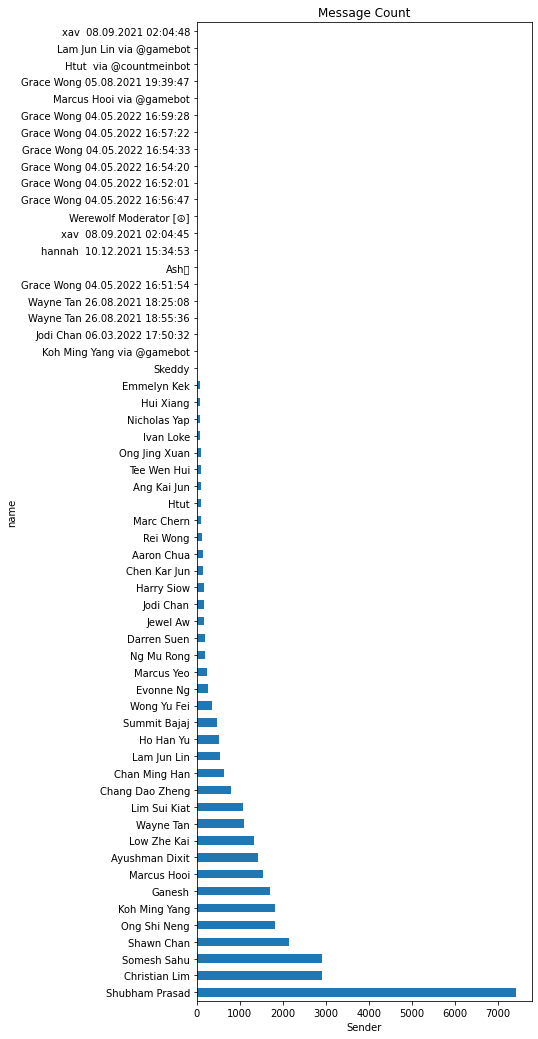

In [ ]:
plt.figure(figsize=(6,18))
plt.title('Message Count')
plt.xlabel('Sender')
plt.ylabel('Number of Messages')
df.groupby('name').count()['text'].sort_values(ascending=False).plot(kind='barh')